In [80]:
%matplotlib widget

import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf
import PandemiXModelFunctions as pmf

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
            
import datetime
             
from scipy.integrate import cumtrapz
# int_I = cumtrapz(np.exp(u_H*ts)*Is,ts, initial=0)
# Hs = np.exp(-u_H*ts) * (r_chr*pars_full['gamma']*int_I + k) 

In [81]:
# Reload PandemiXModelFunctions, in case changes have been made
import importlib 
importlib.reload(pmf)

<module 'PandemiXModelFunctions' from 'c:\\Users\\rakrpe\\GithubRepos\\PandemiX\\modelling\\PandemiXModelFunctions.py'>

# SIYR

In [148]:


iniImmu = 0
iniInf = 0.000001

I_0 = 0
Y_0 = iniInf
R_0 = iniImmu
S_0 = 1 - I_0 - Y_0 - R_0 

init = {'S' : S_0, 'I': I_0, 'Y': Y_0}

gammas = 1/4.7
beta_Y = 1.3*gammas
beta_I = 1.8*gammas
pars = {'beta_I' : beta_I,'gamma_I':gammas,'beta_Y':beta_Y,'gamma_Y':gammas}

numDaysToSim = 300
tEnd = numDaysToSim
sch1 = pmf.Scheme('SIYR',init,pars,0,tEnd,Changes=[])


In [152]:
tChange = 100
toAdd = iniInf
dictToAdd =  {  
    'S' : -toAdd,
    'I' : toAdd,
}
addI = pmf.Change(tChange, AddVariables=dictToAdd)

sch2 = sch1.copy() 
sch2.addChange(addI)


tLock = 165
betaAdd = -0.2 * gammas
dictToAdd = {'beta_I' : betaAdd,'beta_Y' : betaAdd}
betaAddChange = pmf.Change(tLock,AddParameters=dictToAdd)

# sch2 = sch1.copy()
sch2.addChange(betaAddChange)

C:\Users\rakrpe\AppData\Local\Temp\ipykernel_77404\935191592.py:18: RuntimeWarning: divide by zero encountered in log
  ax2.plot(curT,np.log(curRatio/(1-curRatio)))


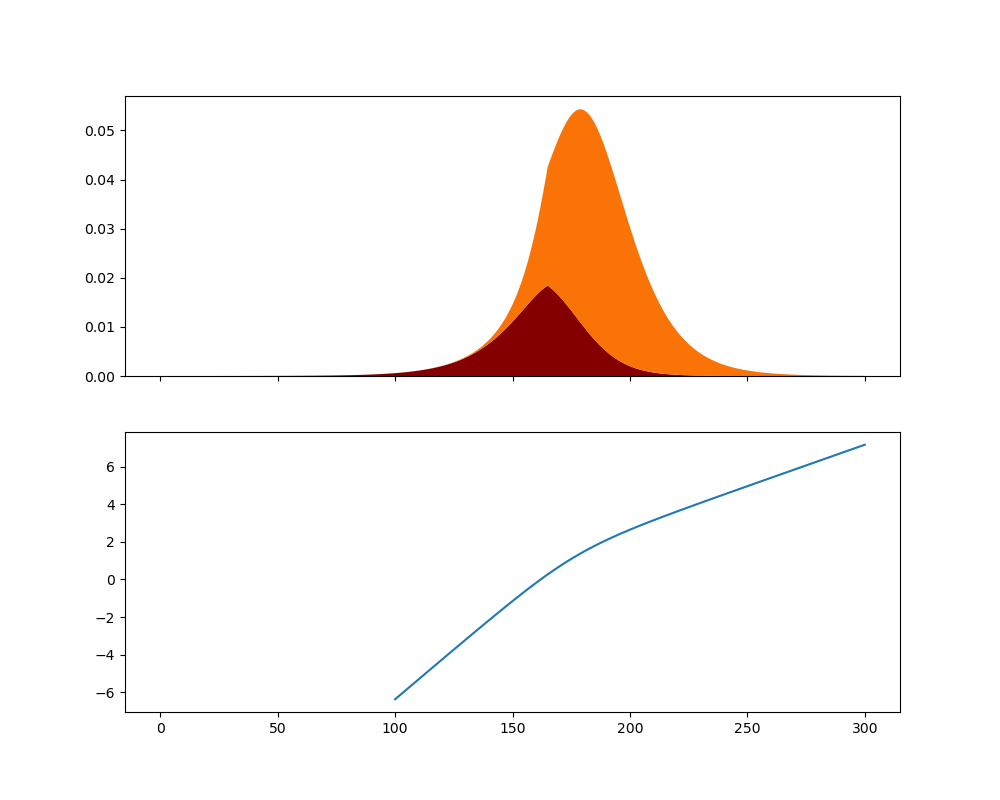

In [157]:
curSch = sch2
curSch.simulate(tRes=4000)

curT = curSch.result.t
curR = 1-curSch.result.S-curSch.result.I-curSch.result.Y

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,8),sharex=True)

ax1.stackplot(curT,
                curSch.result.Y,
                curSch.result.I,
                colors=['xkcd:dark red','xkcd:orange'],
                )

curRatio  = curSch.result.I/(curSch.result.Y+curSch.result.I)
# ax2.plot(curT,curRatio)
# ax2.plot(curT,np.log(curRatio))
ax2.plot(curT,np.log(curRatio/(1-curRatio)))

# ax1.stackplot(curT,
#                 curSch.result.Y,
#                 curSch.result.I,
#                 curSch.result.S,
#                 curR,
#                 colors=['xkcd:dark red','xkcd:orange','xkcd:blue','xkcd:green'],
#                 )


# Other model below

In [127]:


iniVacc = 0
iniImmu = 0
iniInf = 0.000001


V_0 = iniVacc 
IS_0 = 0
IV_0 = 0
Y_0 = iniInf
R01_0 = iniImmu
R10_0 = 0
I01_0 = 0
Y10_0 = 0
S_0 = 1 - V_0 - IS_0 - IV_0 - Y_0 - R01_0 - R10_0 - I01_0 - Y10_0 

init = {'S' : S_0,'V' : V_0,'IS' : IS_0,'IV' : IV_0,'Y' : Y_0,'R01' : R01_0,'R10' : R10_0,'I01' : I01_0,'Y10' : Y10_0}

gammas = 1/4.7
beta_Y = 1.3*gammas
beta_I = 1.5*gammas

pars = {'beta_IS_S' : beta_I,'beta_IV_S' : beta_I,'beta_I01_S' : beta_I,'beta_IS_V' : beta_I,'beta_IV_V' : beta_I,'beta_I01_V' : beta_I,'beta_IS_R01' : beta_I,'beta_IV_R01' : beta_I,'beta_I01_R01' : beta_I,'beta_Y_S' : beta_Y,'beta_Y10_S' : beta_Y,'beta_Y_R10' : beta_Y,'beta_Y10_R10' : beta_Y,'gamma_IS' : gammas,'gamma_IV' : gammas,'gamma_Y' : gammas,'gamma_I01' : gammas,'gamma_Y10' : gammas}

numDaysToSim = 300
tEnd = numDaysToSim+20
sch1 = pmf.Scheme('OmikronDeltaFull',init,pars,3,tEnd,Changes=[])


In [136]:
tChange = 100
toAdd = iniInf/10
dictToAdd =  {  
    'S' : -toAdd,
    'IS' : toAdd,
}
addI = pmf.Change(tChange, AddVariables=dictToAdd)

sch2 = sch1.copy() 
sch2.addChange(addI)


tLock = 200
betaAdd = -0.2 * gammas
dictToAdd = {'beta_IS_S' : betaAdd,'beta_IV_S' : betaAdd,'beta_I01_S' : betaAdd,'beta_IS_V' : betaAdd,'beta_IV_V' : betaAdd,'beta_I01_V' : betaAdd,'beta_IS_R01' : betaAdd,'beta_IV_R01' : betaAdd,'beta_I01_R01' : betaAdd,'beta_Y_S' : betaAdd,'beta_Y10_S' : betaAdd,'beta_Y_R10' : betaAdd,'beta_Y10_R10' : betaAdd}
betaAddChange = pmf.Change(tLock,AddParameters=dictToAdd)

# sch2 = sch1.copy()
sch2.addChange(betaAddChange)

C:\Users\rakrpe\AppData\Local\Temp\ipykernel_77404\63013939.py:28: RuntimeWarning: divide by zero encountered in log
  ax2.plot(curT,np.log(curRatio/(1-curRatio)))


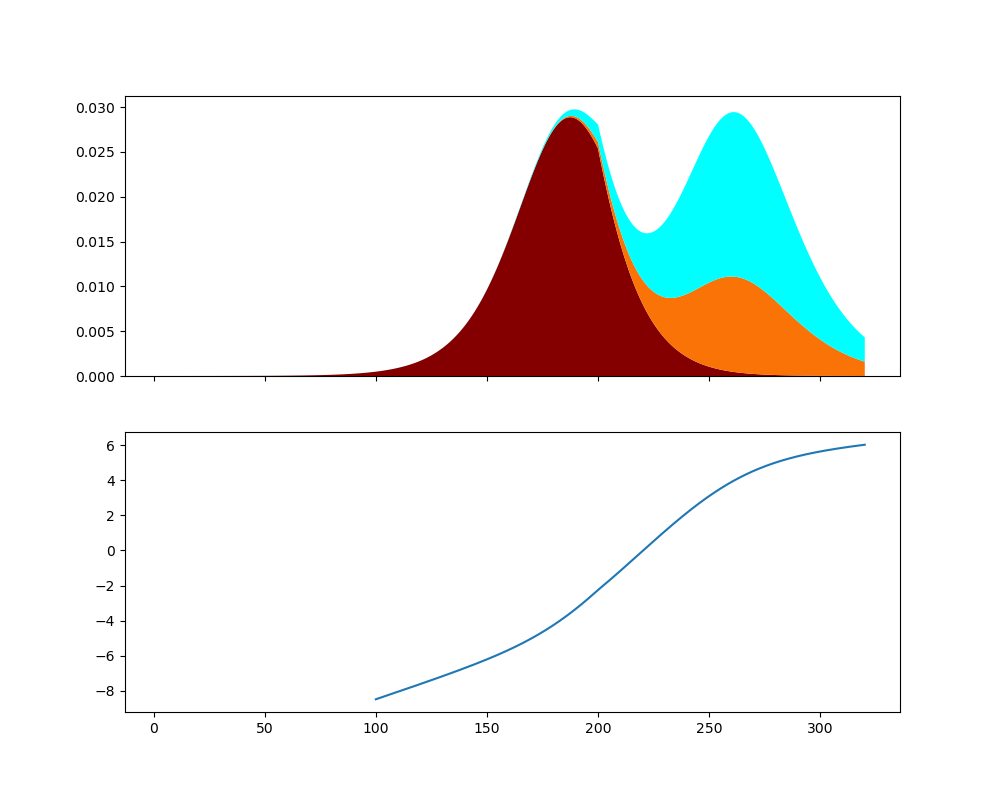

In [137]:
curSch = sch2
curSch.simulate(tRes=4000)

curT = curSch.result.t

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,8),sharex=True)

ax1.stackplot(curT,
                curSch.result.Y,
                curSch.result.I01,
                curSch.result.IV,
                curSch.result.IS,
                colors=['xkcd:dark red','xkcd:orange','xkcd:dark blue','xkcd:cyan'],
                )



totI = curSch.result.I01 + curSch.result.IV + curSch.result.IS 
totY = curSch.result.Y + curSch.result.Y10 

curRatio = totI/(totI+totY)


# ax2.plot(curT,curRatio)
# ax2.set_ylim([0,1]) 


ax2.plot(curT,np.log(curRatio/(1-curRatio)))

# ax2.plot(curT,curRatio/(1-curRatio))

# ax1.set_ylim(top=10000,bottom=0)

In [ ]:
curSch.result.S

In [86]:
# fig,ax1 = plt.subplots()

# totI = curSch.result.I01 + curSch.result.IV + curSch.result.IS 
# totY = curSch.result.Y + curSch.result.Y10 

# curRatio = totI/(totI+totY)


# ax1.plot(curT,curRatio)

# ax1.set_ylim([0,1])